# Analiza danych dotyczących połączeń alarmowych

Projekt oparty jest na danych dostępnych na stronie [Kaggle](https://www.kaggle.com/mchirico/montcoalert).
Zawiera on informacje o połączeniach alarmowych, w hrabstwie Montgomery w stanie Pennsylvania w USA.
911 to odpowiednik polskiego 112. Wybiera się go w nagłych przypadkach, gdy potrzebna jest pomoc policji, pogotowia ratunkowego lub straży pożarnej.

Pierwszym krokiem jest pobranie potrzebnych bibliotek do realizacji tego projektu.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
%matplotlib inline

Kolejnym krokiem jest zaimportowanie danych.

In [2]:
calls = pd.read_csv('911.csv')
calls.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


Jednym z ważniejszych elementów jakie należy zrobić jest analiza danych w celu ich zrozumienia.

In [3]:
calls.loc[0]

lat                                                    40.2979
lng                                                   -75.5813
desc         REINDEER CT & DEAD END;  NEW HANOVER; Station ...
zip                                                      19525
title                                   EMS: BACK PAINS/INJURY
timeStamp                                  2015-12-10 17:10:52
twp                                                NEW HANOVER
addr                                    REINDEER CT & DEAD END
e                                                            1
Name: 0, dtype: object

Objaśnienia nazw kolumn:

* lat - latitude: szerokość geograficzna
* lng - longitude: długość geograficzna
* desc - description: opis wezwania
* zip - zipcode: kod pocztowy
* title: tytuł wezwania
* timeStamp - data i godzina
* twp - township: nazwa podziału administracyjnego w USA, odpowiednik gminy w Polsce
* addr: adres
* e: zmienna "manekin" (dummy), wszędzie wynosi 1.

In [4]:
calls.head(3)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 663522 entries, 0 to 663521
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   lat        663522 non-null  float64
 1   lng        663522 non-null  float64
 2   desc       663522 non-null  object 
 3   zip        583323 non-null  float64
 4   title      663522 non-null  object 
 5   timeStamp  663522 non-null  object 
 6   twp        663229 non-null  object 
 7   addr       663522 non-null  object 
 8   e          663522 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 45.6+ MB


Baza danych zawiera 639 898 rekordów. Warto zauważyć, że większość kolumn także posiada 639 898 wierszy. Wyjątkami są "zip", "addr" i "twp". Oznacza to, że w tych kolumnach występują braki danych. Najwyraźniej w niektórych przypadkach wezwania 911, nie odnotowuje się adresu, jednak współrzędne geograficzne podane są każdorazowo. Opis i tytuł także występują przy każdym zgłoszneiu. Nie ma więc potrzeby usuwania braków danych.

In [6]:
calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


Ważnym elementem analizy danych jest uporządkowanie bazy danych.

In [7]:
type(calls['timeStamp'].iloc[0]) 

str

Kolumna "timeStamp" jest tekstem, należy zmienić jej typ.

In [8]:
calls['timeStamp'] = pd.to_datetime(calls['timeStamp']) 

In [9]:
type(calls['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

Teraz możemy rozbić tę kolumnę na mniejsze części. Wydobywamy z niej rok, miesiąc, dzień tygodnia i godzinę.

In [10]:
calls['year'] = calls['timeStamp'].apply(lambda y: y.year)
calls['month'] = calls['timeStamp'].apply(lambda m: m.month)
calls['day of week'] = calls['timeStamp'].apply(lambda d: d.dayofweek)
calls['hour'] = calls['timeStamp'].apply(lambda h: h.hour)

calls.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,year,month,day of week,hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,3,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,3,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,2015,12,3,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,3,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,3,16


In [11]:
calls['year'].unique() 

array([2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

Dane obejmują lata 2015-2020.

In [12]:
calls.drop('timeStamp', axis = 1, inplace = True)

In [13]:
calls['title'] 

0              EMS: BACK PAINS/INJURY
1             EMS: DIABETIC EMERGENCY
2                 Fire: GAS-ODOR/LEAK
3              EMS: CARDIAC EMERGENCY
4                      EMS: DIZZINESS
                     ...             
663517    Traffic: VEHICLE ACCIDENT -
663518          EMS: GENERAL WEAKNESS
663519          EMS: VEHICLE ACCIDENT
663520            Fire: BUILDING FIRE
663521    Traffic: VEHICLE ACCIDENT -
Name: title, Length: 663522, dtype: object

Kolumna "title" zawiera dwie informacje, ogólną przyczynę połączenia z 911 oraz jej doprecyzowanie. Analognicznie jak w poprzednim przypadku, umieszczę te informacje w odzielnych kolumnach.

In [14]:
calls['general reason'] = calls['title'].apply(lambda title: title.split(':')[0])
calls['detailed reason'] = calls['title'].apply(lambda title: title.split(':')[1])
calls.drop(labels = ['title', 'desc'], axis = 1, inplace = True)

In [15]:
calls.head()

,lat,lng,zip,twp,addr,e,year,month,day of week,hour,general reason,detailed reason
0,40.297876,-75.581294,19525.0,NEW HANOVER,REINDEER CT & DEAD END,1,2015,12,3,17,EMS,BACK PAINS/INJURY
1,40.258061,-75.264680,19446.0,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,2015,12,3,17,EMS,DIABETIC EMERGENCY
2,40.121182,-75.351975,19401.0,NORRISTOWN,HAWS AVE,1,2015,12,3,14,Fire,GAS-ODOR/LEAK
3,40.116153,-75.343513,19401.0,NORRISTOWN,AIRY ST & SWEDE ST,1,2015,12,3,16,EMS,CARDIAC EMERGENCY
4,40.251492,-75.603350,NaN,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,2015,12,3,16,EMS,DIZZINESS


Teraz, gdy nasza baza danych nie zawiera zbędnych i zagregowanych informacji, przyjrzyjmy się dokłdniej naszym danym. Na początek, sprawdźmy jakie są najczęstrze powody połączenia 911.

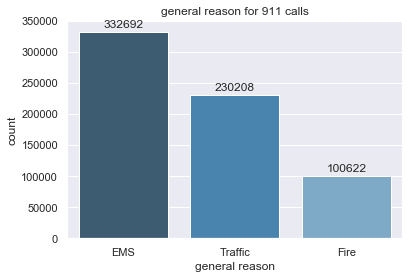

In [16]:
general_reason = calls['general reason'].value_counts()

sns.countplot(x = 'general reason', data = calls, palette = 'Blues_d', order = general_reason.index)
plt.title('general reason for 911 calls')
plt.ylim(0,350000)

for i in range(3):
    plt.text(i, general_reason[i]+7000, general_reason[i], fontname = 'Arial', fontsize = 12, ha = 'center')

Najczęściej wzywano EMS - Emergency Medical Services, czyli pogotowie ratunkowe. Drugą najczęstszą przyczyną wezwań 911 są zdarzeania drogowe, trzecią, najmniej liczną, pożary. Poniżej wypisane są unikatowe przyczyny wezwanie służb oraz wykresy najpopularniejszych z nich.

In [17]:
print(calls['detailed reason'][calls['general reason']== 'EMS'].unique())  
print(calls['detailed reason'][calls['general reason']== 'EMS'].nunique()) 

[' BACK PAINS/INJURY' ' DIABETIC EMERGENCY' ' CARDIAC EMERGENCY'
 ' DIZZINESS' ' HEAD INJURY' ' NAUSEA/VOMITING' ' RESPIRATORY EMERGENCY'
 ' SYNCOPAL EPISODE' ' VEHICLE ACCIDENT' ' GENERAL WEAKNESS'
 ' UNKNOWN MEDICAL EMERGENCY' ' UNRESPONSIVE SUBJECT'
 ' ALTERED MENTAL STATUS' ' CVA/STROKE' ' SUBJECT IN PAIN' ' HEMORRHAGING'
 ' FALL VICTIM' ' ASSAULT VICTIM' ' SEIZURES' ' MEDICAL ALERT ALARM'
 ' ABDOMINAL PAINS' ' OVERDOSE' ' MATERNITY' ' UNCONSCIOUS SUBJECT'
 ' CHOKING' ' LACERATIONS' ' FEVER' ' ALLERGIC REACTION' ' FRACTURE'
 ' BURN VICTIM' ' RESCUE - GENERAL' ' WARRANT SERVICE'
 ' EMS SPECIAL SERVICE' ' FIRE SPECIAL SERVICE' ' DEHYDRATION'
 ' CARBON MONOXIDE DETECTOR' ' BUILDING FIRE' ' APPLIANCE FIRE'
 ' SHOOTING' ' POISONING' ' RESCUE - TECHNICAL' ' EYE INJURY'
 ' ELECTROCUTION' ' STABBING' ' AMPUTATION' ' ANIMAL BITE' ' FIRE ALARM'
 ' VEHICLE FIRE' ' HAZARDOUS MATERIALS INCIDENT' ' RESCUE - ELEVATOR'
 ' FIRE INVESTIGATION' ' UNKNOWN TYPE FIRE' ' GAS-ODOR/LEAK'
 ' TRANSFERRED CAL

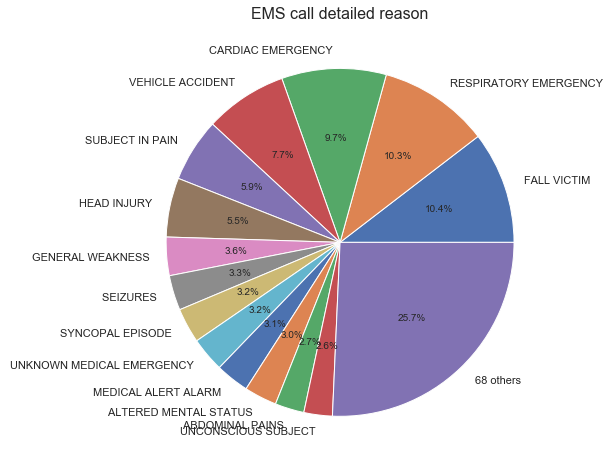

In [18]:
EMS = calls['detailed reason'][calls['general reason'] == 'EMS'].value_counts()
EMS_new = EMS[EMS >= 8500]
EMS_other_sum = EMS[EMS < 8500].values.sum()
other = pd.Series(EMS_other_sum, index = [' 68 others'])
EMS_new = EMS_new.append(other)

plt.figure(figsize = (8,8))
plt.title('EMS call detailed reason', fontsize = 16)
labels = EMS_new.index
values = EMS_new.values

plt.pie(x= values, labels = labels, autopct = '%.1f%%')

plt.show()

In [19]:
print( calls['detailed reason'][calls['general reason']== 'Traffic'].unique() )
print( calls['detailed reason'][calls['general reason']== 'Traffic'].nunique() )

[' VEHICLE ACCIDENT -' ' DISABLED VEHICLE -' ' ROAD OBSTRUCTION -'
 ' DEBRIS/FLUIDS ON HIGHWAY -' ' VEHICLE LEAKING FUEL -' ' VEHICLE FIRE -'
 ' HAZARDOUS ROAD CONDITIONS -']
7


Text(0.5, 1.0, 'zoom')

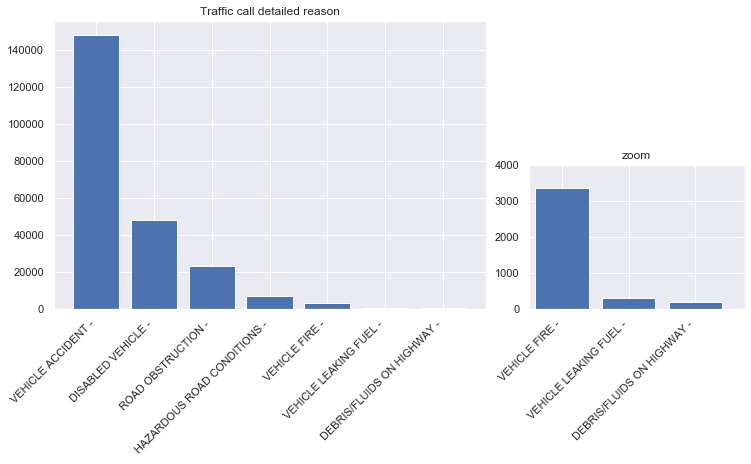

In [20]:
Traffic = calls['detailed reason'][calls['general reason']== 'Traffic'].value_counts()
values = Traffic.values
labels = Traffic.index

fig = plt.figure()

ax1 = fig.add_axes([0,0,1,1])
ax1.bar(labels, values )
ax1.set_xticklabels(labels, rotation = 45, ha = 'right')
ax1.set_title('Traffic call detailed reason')

ax2 = fig.add_axes([1.1,0,0.5,0.5])
ax2.bar(labels, values )
ax2.set_xticklabels(labels, rotation = 45, ha = 'right')
ax2.set_xlim(3.5,None)
ax2.set_ylim(None, 4000)
ax2.set_title('zoom')

In [21]:
print( calls['detailed reason'][calls['general reason']== 'Fire'].unique() )
print( calls['detailed reason'][calls['general reason']== 'Fire'].nunique() )

[' GAS-ODOR/LEAK' ' APPLIANCE FIRE' ' CARBON MONOXIDE DETECTOR'
 ' VEHICLE ACCIDENT' ' FIRE ALARM' ' PUMP DETAIL' ' FIRE INVESTIGATION'
 ' TRASH/DUMPSTER FIRE' ' UNKNOWN TYPE FIRE' ' BUILDING FIRE'
 ' ELECTRICAL FIRE OUTSIDE' ' DEBRIS/FLUIDS ON HIGHWAY' ' BURN VICTIM'
 ' RESCUE - GENERAL' ' WOODS/FIELD FIRE' ' FIRE SPECIAL SERVICE'
 ' VEHICLE FIRE' ' S/B AT HELICOPTER LANDING' ' RESCUE - ELEVATOR'
 ' TRANSFERRED CALL' ' RESCUE - TECHNICAL' ' VEHICLE LEAKING FUEL'
 ' FIRE POLICE NEEDED' ' MEDICAL ALERT ALARM' ' TRAIN CRASH'
 ' HAZARDOUS MATERIALS INCIDENT' ' UNKNOWN MEDICAL EMERGENCY'
 ' RESCUE - WATER' ' PLANE CRASH' ' CARDIAC ARREST' ' EMS SPECIAL SERVICE'
 ' UNCONSCIOUS SUBJECT' ' POLICE INFORMATION' ' DIABETIC EMERGENCY'
 ' SYNCOPAL EPISODE' ' FALL VICTIM' ' CARDIAC EMERGENCY'
 ' UNRESPONSIVE SUBJECT' ' DISABLED VEHICLE' ' ANIMAL COMPLAINT'
 ' STANDBY FOR ANOTHER CO' ' PRISONER IN CUSTODY' ' SUSPICIOUS'
 ' SUBJECT IN PAIN' ' RESPIRATORY EMERGENCY' ' SUICIDE ATTEMPT'
 ' NAUSEA/VOMITI

Text(0.5, 1.0, 'Fire call reason')

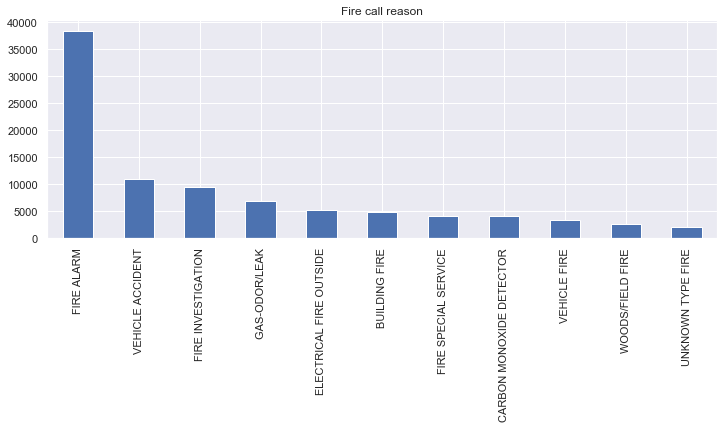

In [22]:
plt.figure(figsize=(12,4))
calls['detailed reason'][calls['general reason']== 'Fire'].value_counts().plot(kind = 'bar')
plt.xlim(None, 10.5)
plt.title ('Fire call reason')

Przyjrzyjmy się jak kształtowały się dane na przstrzeni lat

In [23]:
arr = calls['year'].unique()
year = []
for i in arr:
    year.append(calls[calls['year'] == i]['e'].count())

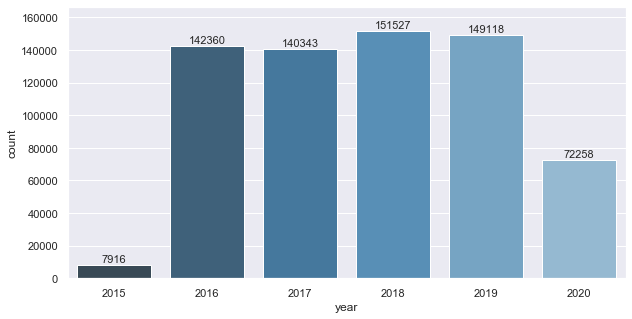

In [24]:
plt.figure(figsize = (10,5))
sns.countplot(x = 'year', data = calls, palette = 'Blues_d')
plt.ylim(None, max(year)*1.1)
for i in range(6):
    plt.text(i, year[i]+2000, year[i], fontname = 'Arial', fontsize = 11, ha = 'center')

In [25]:
for i in arr:
    print(i, calls['month'][calls['year'] == i].unique())

2015 [12]
2016 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2017 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2018 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2019 [ 1  2  3  4  5  6  7  8  9 10 11 12]
2020 [1 2 3 4 5 6 7]


Widać, że lata 2015 i 2020 nie są kompletne. W 2015 roku posiadamy obserwacje tylko z grudnia, a w 2020 do od stycznia do maja.
Natomiast lata 2016 - 2019 zawierają dane z wszystkich 12 miesięcy

In [26]:
calls2 = calls[calls['year'].isin(arr[1:5])]

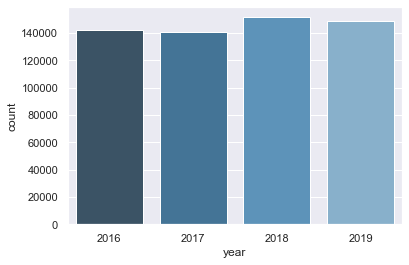

In [27]:
sns.countplot(x = 'year', data = calls2, palette = 'Blues_d')

Dzięki tej operacji wyniki ilościowe w poszczególnych miesiącach będą wiarygodne. Możemy przygotować teraz ilościowy wykres wezwania 911 dla każdego z miesięcy. Oto kilka przykładowych wykresów jakie można sporządzić na podstawie posiadanych danych

Text(0.5, 1.0, '911 calls by month, 2016-2019')

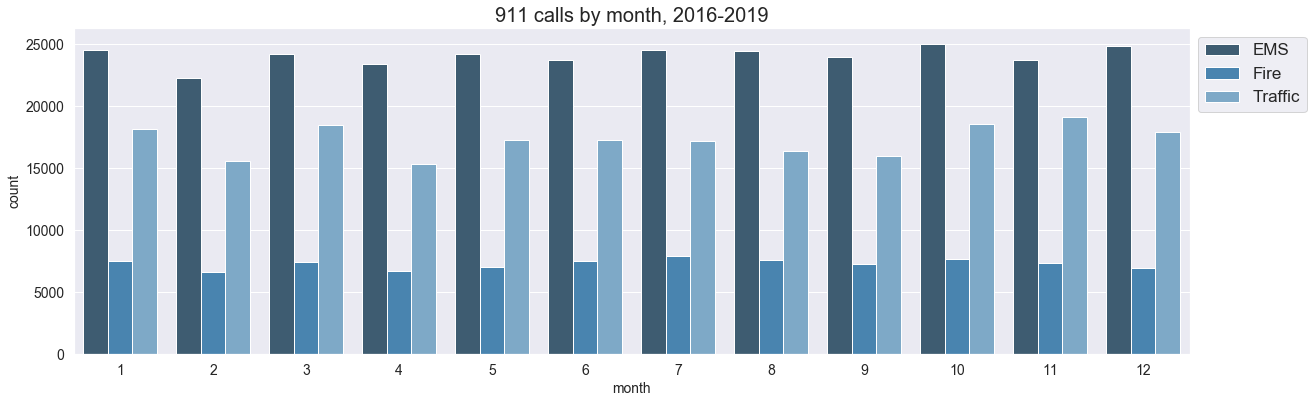

In [28]:
plt.figure(figsize = (20,6))

sns.countplot(x = 'month', data = calls2, hue = 'general reason', palette = 'Blues_d')
plt.legend(bbox_to_anchor = (1,1), prop = {'size': 17})

plt.xticks(fontsize = 14)
plt.xlabel('month', fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylabel('count', fontsize = 14)

plt.title('911 calls by month, 2016-2019', fontsize = 20)

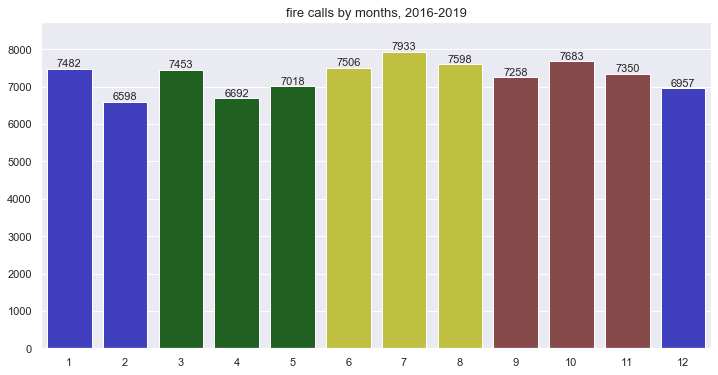

In [29]:
colors = {1:'blue', 2:'blue', 3:'green',
          4:'green', 5:'green', 6:'yellow',
          7:'yellow', 8:'yellow', 9:'brown',
          10:'brown', 11:'brown', 12:'blue'}

Fire = calls2['month'][calls2['general reason'] == 'Fire'].value_counts()
Fire.sort_index(inplace = True)

values = Fire.values
labels = Fire.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors, saturation=0.5)
plt.title('fire calls by months, 2016-2019', fontsize = 13)
plt.ylim(None, max(values)*1.1)
for i in range(12):
    plt.text(i, values[i]+50, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

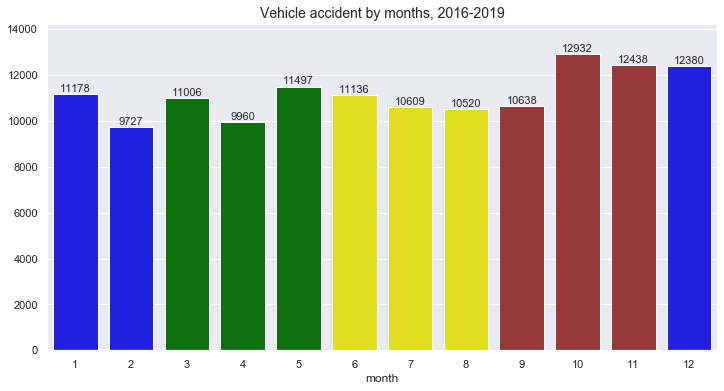

In [30]:
Vehicle_accident = calls2['month'][calls2['detailed reason'] == ' VEHICLE ACCIDENT -'].value_counts()
Vehicle_accident.sort_index(inplace = True)

values = Vehicle_accident.values
labels = Vehicle_accident.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors)

plt.title('Vehicle accident by months, 2016-2019', fontsize = 14)
plt.ylim(None, max(values)*1.1)
plt.xlabel('month')

for i in range(12):
    plt.text(i, values[i]+100, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

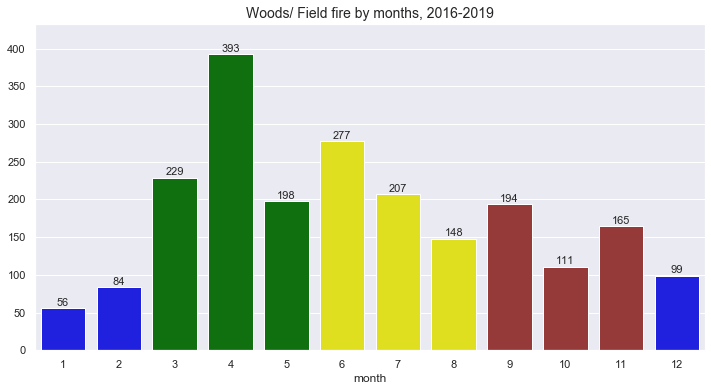

In [31]:
Wood_fire = calls2['month'][calls2['detailed reason'] == ' WOODS/FIELD FIRE'].value_counts()
Wood_fire.sort_index(inplace = True)
values = Wood_fire.values
labels = Wood_fire.index

plt.figure(figsize = (12,6))
sns.barplot(x = labels, y = values, palette = colors )

plt.title('Woods/ Field fire by months, 2016-2019', fontsize = 14)
plt.xlabel('month')
plt.ylim(None, max(values)*1.1)

for i in range(12):
    plt.text(i, values[i]+3, values[i], fontname = 'Arial', fontsize = 11, ha = 'center')

Sprawdzmy teraz w jakie dni tygodnia i w jakich godzinach odnotowuje się najwięcej zgłoszeń. W tym celu sporządzę mapę ciepła.

In [32]:
dh = calls.groupby(by = ['hour', 'day of week']).count()['general reason'].unstack()

In [33]:
dh.head()

day of week,0,1,2,3,4,5,6
hour,,,,,,,
0,1894,1720,1664,1731,1983,2447,2424
1,1571,1459,1484,1408,1635,2059,2135
2,1368,1322,1259,1426,1449,1883,1946
3,1272,1213,1265,1236,1296,1592,1614
4,1336,1247,1128,1293,1339,1451,1471


Text(0.5, 1, 'heamap, 911 calls')

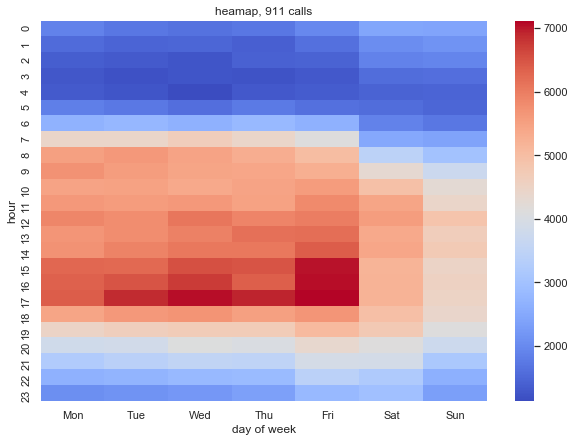

In [34]:
plt.figure(figsize = (10,7))
sns.heatmap(dh, cmap = 'coolwarm', 
            xticklabels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("heamap, 911 calls")

Zauważyć moża wiele zależności.
1. W dni powszednie odnotowuje się wiecej połączeń alarmowych niż w soboty i niedziele. Można to wytłumaczyć na przykład wzmożonym ruchem drogowym związanym z pracą.
2. Najwięcej połączeń odnotowuje się w godzinach 15 - 17, czyli w godzinach w których zazwyczaj kończy się pracę i ruch jest największy
3. Najniebzepieczniejszym okresem są piątki w godzinach między 15 - 17. Pamiętajmy żeby nie myśleć o weekendzie za wcześnie ;)
4. W dni powszednie najmniej zgłoszeń odnotowuje się między 24 a 5, a w weekendy między 3 a 7.  
5. W godzinach wieczornych w piątki i soboty odnotowuje się więcej zgłoszeń niż o tej samej porze w pozostałych dniach tygodnia. Wniosek: trzeba uważać po spożyciu alkoholu ;) 
6. Niedziela jest zdecydowania najspokojniejszym dniem w tygodniu.

In [35]:
calls_corona = calls[(calls['year'] == 2020) & (calls['month'].isin(np.arange(3,6)))]

In [36]:
dhc = calls_corona.groupby(by = ['hour', 'day of week']).count()['general reason'].unstack()

Text(0.5, 1, 'heatmap, 911 calls in COVID-19 pandemy')

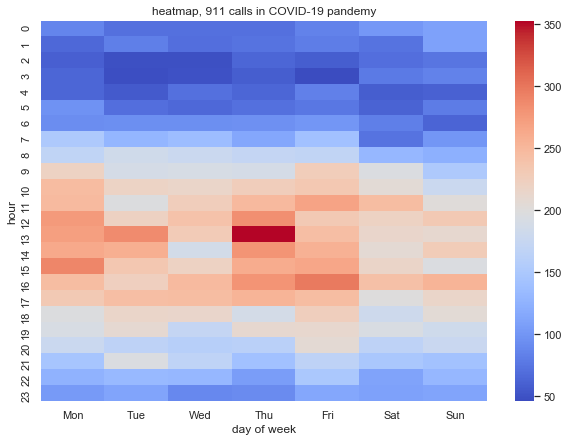

In [37]:
plt.figure(figsize = (10,7))
sns.heatmap(dhc, cmap = 'coolwarm', 
            xticklabels= ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.title("heatmap, 911 calls in COVID-19 pandemy")

Ta mapa ciepła obrazuje rozkład połączeń alarmowych w czasie panedmii koronawirusa (marzec - maj 2020 rok). O ile z poprzedniej mapy można było wyciągnąć wiele winiosków, o tyle ta wydaje się bardzo chaotyczna. Nie widać wyraźnych zależności między dniami tygodnia. Wydaje mi się, że chwilowe zwiększenia przypadków są bardziej kwestią przypadku. Można dostrzec podobieństwo w godzinowym rozkładzie połączeń. Nadal godziny wczesno poranne i nocne są spokojniejsze od południowych i popołudniowych. Różnice są jednak bardziej subtelne. Warto odnotować także różnicę w skali. Mapa druga ma o wiele krótszy okres więc i liczba zgłoszeń jest mniejsza. 

Uważam, że analiza wskazała kilka prawdziwych problemów, które mogą pomóc w zwiększeniu bezpieczeństwa. Możliwości jakie daje analiza danych w Pythonie jest ogromna. Z suchych danych można wyciągnąć na prawdę ciekawe wnioski.Z pewnością analizowane dane skrywają jeszcze wiele sekretów, które dałoby się odkryć.